<a href="https://colab.research.google.com/github/randifajar/water-quality-classification/blob/main/predict-students-dropout-and-academic-success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score

## Mengambil Dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%mkdir dataset
%cp /content/drive/MyDrive/dataset/water_potability.csv /content/dataset/

mkdir: cannot create directory ‘dataset’: File exists


In [128]:
dataset = pd.read_csv('/content/dataset/water_potability.csv')
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Mengisi Missing Values

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [129]:
dataset["ph"] = dataset["ph"].astype("float32")
dataset["Hardness"] = dataset["Hardness"].astype("float32")
dataset["Solids"] = dataset["Solids"].astype("float32")
dataset["Chloramines"] = dataset["Chloramines"].astype("float32")
dataset["Sulfate"] = dataset["Sulfate"].astype("float32")
dataset["Conductivity"] = dataset["Conductivity"].astype("float32")
dataset["Organic_carbon"] = dataset["Organic_carbon"].astype("float32")
dataset["Trihalomethanes"] = dataset["Trihalomethanes"].astype("float32")
dataset["Turbidity"] = dataset["Turbidity"].astype("float32")

In [88]:
nan_col = dataset.isna().sum().sort_values(ascending = False)
nan_col

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [89]:
# mendapatkan persentase missing value tiap kolom
n_data = len(dataset)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [125]:
dataset.dropna(axis = 0, inplace = True)
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0
5,5.584086,188.313324,28748.687500,7.544869,326.678375,280.467926,8.399734,54.917862,2.559708,0
6,10.223862,248.071732,28749.716797,7.513409,393.663391,283.651642,13.789696,84.603554,2.672989,0
7,8.635849,203.361526,13672.091797,4.563009,303.309784,474.607635,12.363816,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047363,15921.412109,6.297311,312.931030,390.410217,9.899116,55.069305,4.613843,1
3268,6.702547,207.321091,17246.919922,7.708117,304.510223,329.265991,16.217302,28.878601,3.442983,1
3269,11.491011,94.812546,37188.824219,9.263166,258.930603,439.893616,16.172756,41.558502,4.369264,1
3270,6.069616,186.659042,26138.779297,7.747548,345.700256,415.886963,12.067619,60.419922,3.669712,1


In [130]:
imputer = KNNImputer()
imputed_dataset = pd.DataFrame(imputer.fit_transform(dataset))
imputed_dataset.columns = dataset.columns
imputed_dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890457,20791.318359,7.300212,368.516449,564.308655,10.379783,86.990967,2.963135,0.0
1,3.716080,129.422928,18630.058594,6.635246,336.094348,592.885376,15.180013,56.329075,4.500656,0.0
2,8.099124,224.236252,19909.541016,9.275884,330.449170,418.606201,16.868637,66.420090,3.055934,0.0
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0.0
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681732,47580.992188,7.166639,359.948578,526.424194,13.894419,66.687698,4.435821,1.0
3272,7.808856,193.553207,17329.802734,8.061362,364.091541,392.449585,19.903225,64.327280,2.798243,1.0
3273,9.419510,175.762650,33155.578125,7.350233,327.357587,432.044769,11.039070,69.845398,3.298876,1.0
3274,5.126763,230.603760,11983.869141,6.303357,325.952435,402.883118,11.168946,77.488213,4.708659,1.0


## Dataset Normalization

In [54]:
# KMeansClustering - delete outlier
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(dataset)
labels = kmeans.labels_
df_kmeans = dataset[labels == 1]
df_kmeans.reset_index(inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


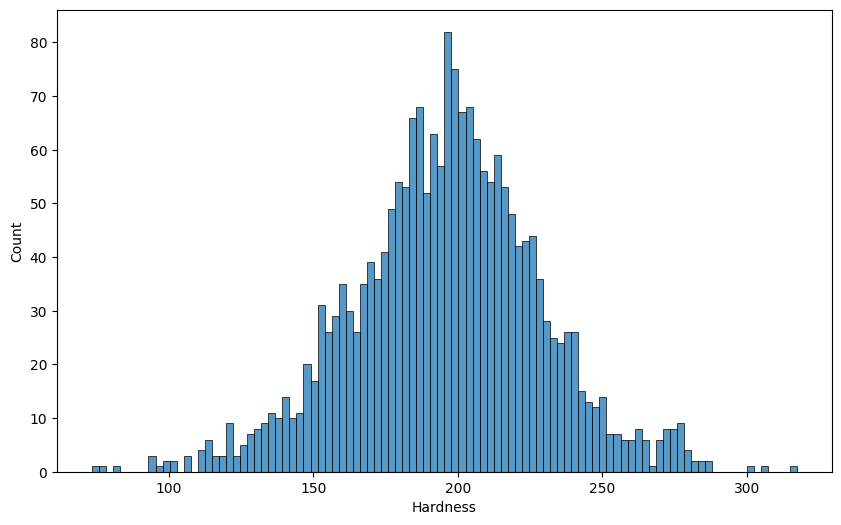

In [74]:
# buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = dataset,
             x = "Hardness",
             bins = 100,
             ax = ax)

plt.show()

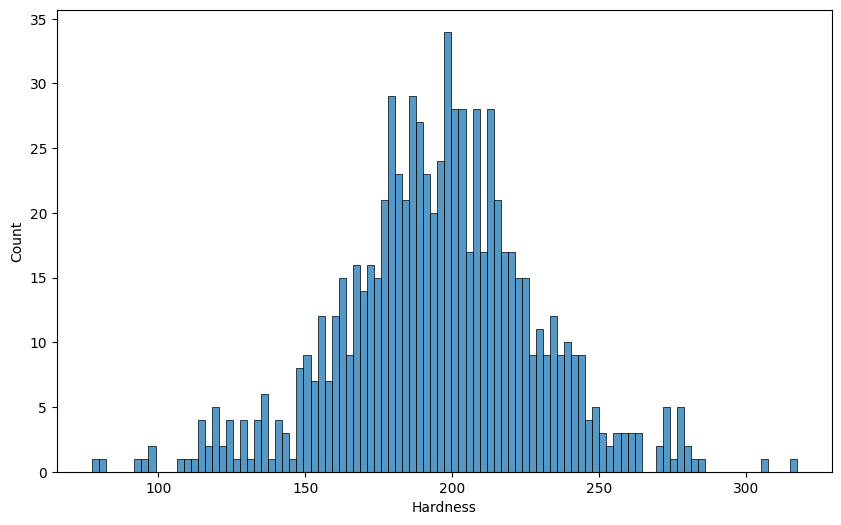

In [75]:
# buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = df_kmeans,
             x = "Hardness",
             bins = 100,
             ax = ax)

plt.show()

In [131]:
X = imputed_dataset.drop('Potability', axis=1).to_numpy()
y = imputed_dataset['Potability'].to_numpy()

In [132]:
X[0]

array([7.15685692e+00, 2.04890457e+02, 2.07913184e+04, 7.30021191e+00,
       3.68516449e+02, 5.64308655e+02, 1.03797827e+01, 8.69909668e+01,
       2.96313548e+00])

In [119]:
X = normalize(X)
X[0]

array([3.7759560e-04, 9.7329244e-03, 9.9967438e-01, 3.6590770e-04,
       1.6203251e-02, 1.6492929e-02, 8.3705026e-04, 4.5556864e-03,
       2.1015420e-04], dtype=float32)

In [103]:
transformer = Normalizer().fit(X)
X = transformer.transform(X)

In [105]:
X[0]

array([3.7759560e-04, 9.7329244e-03, 9.9967438e-01, 3.6590770e-04,
       1.6203251e-02, 1.6492929e-02, 8.3705026e-04, 4.5556864e-03,
       2.1015420e-04], dtype=float32)

## Splitting Data

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [134]:
X_train

array([[4.22922468e+00, 2.07669235e+02, 2.12143711e+04, ...,
        1.34894238e+01, 6.53075714e+01, 3.73313951e+00],
       [5.42034769e+00, 2.32386826e+02, 2.51072090e+04, ...,
        1.08171225e+01, 8.12249832e+01, 3.75672007e+00],
       [8.20544720e+00, 1.45797318e+02, 1.79812539e+04, ...,
        1.58567972e+01, 1.00712303e+02, 3.73992157e+00],
       ...,
       [7.70571089e+00, 1.78922852e+02, 1.84766191e+04, ...,
        1.06387987e+01, 6.31574898e+01, 3.86195612e+00],
       [5.77276993e+00, 1.86060608e+02, 2.66937617e+04, ...,
        1.23762722e+01, 3.27611618e+01, 4.15468550e+00],
       [7.12067466e+00, 1.93629486e+02, 1.87532109e+04, ...,
        1.31729012e+01, 5.26739578e+01, 2.37343764e+00]])

In [135]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [136]:
X_train

array([[-1.91713464,  0.34546098, -0.09799539, ..., -0.23031435,
        -0.06336382, -0.29203472],
       [-1.11429748,  1.11001976,  0.34648861, ..., -1.04353522,
         0.94031288, -0.26190202],
       [ 0.76290693, -1.56834685, -0.46715252, ...,  0.49011246,
         2.16909111, -0.28336819],
       ...,
       [ 0.42607616, -0.5437155 , -0.41059174, ..., -1.09780178,
        -0.1989378 , -0.12742482],
       [-0.8767589 , -0.32293207,  0.52764111, ..., -0.56906286,
        -2.11558648,  0.24664305],
       [ 0.0317518 , -0.08881329, -0.37901051, ..., -0.32663687,
        -0.85997974, -2.02954664]])

In [69]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

In [70]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99375


In [152]:
knn = AdaBoostClassifier(n_estimators=5, estimator=SVC())
knn.fit(X_train, y_train)

NameError: name 'SVC' is not defined

In [153]:
y_pred = knn.predict(X_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6737804878048781


In [49]:
k_values = [i for i in range (1,71)]
scores = []

In [50]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Text(0, 0.5, 'Accuracy Score')

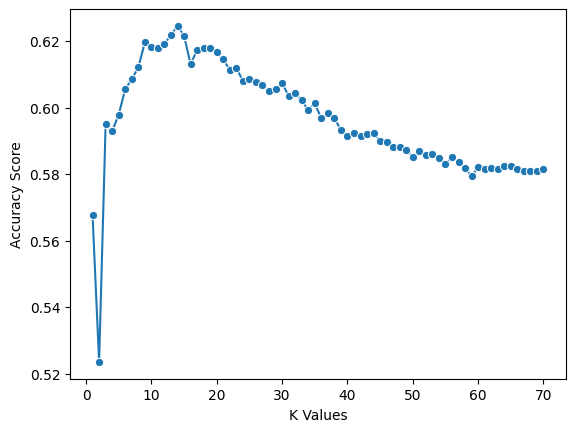

In [51]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")